In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from IPython.display import clear_output

## Building a Simple Neural Network

### Input: data ingestion

In [2]:
distances = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)
times = torch.tensor([[6.96], [12.11], [16.77], [22.21]], dtype=torch.float32)

In [3]:
distances

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [4]:
times

tensor([[ 6.9600],
        [12.1100],
        [16.7700],
        [22.2100]])

### Model building

In [5]:
# Time = Distance x W + B
model = nn.Sequential(nn.Linear(1, 1))
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

### Model training

In [6]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(distances)
    loss = loss_function(outputs, times)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item()}")

Epoch 0: Loss = 218.79188537597656
Epoch 50: Loss = 0.08000704646110535
Epoch 100: Loss = 0.06586293876171112
Epoch 150: Loss = 0.055385105311870575
Epoch 200: Loss = 0.0476217120885849
Epoch 250: Loss = 0.04186917096376419
Epoch 300: Loss = 0.03760717064142227
Epoch 350: Loss = 0.03444927558302879
Epoch 400: Loss = 0.0321093387901783
Epoch 450: Loss = 0.030375737696886063


### Plotting results

In [8]:
def plot_results(model, distances, times):
    """
    Plots the actual data points and the model's predicted line for a given dataset.

    Args:
        model: The trained machine learning model to use for predictions.
        distances: The input data points (features) for the model.
        times: The target data points (labels) for the plot.
    """
    model.eval()

    with torch.no_grad():
        predicted_times = model(distances)

    plt.figure(figsize=(8, 6))
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Delivery Times')
    plt.plot(distances.numpy(), predicted_times.numpy(), color='green', marker='None', label='Predicted Line')
    plt.title('Actual vs. Predicted Delivery Times')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_nonlinear_comparison(model, new_distances, new_times):
    """
    Compares and plots the predictions of a model against new, non-linear data.

    Args:
        model: The trained model to be evaluated.
        new_distances: The new input data for generating predictions.
        new_times: The actual target values for comparison.
    """
    model.eval()
    
    with torch.no_grad():
        predictions = model(new_distances)

    plt.figure(figsize=(8, 6))
    plt.plot(new_distances.numpy(), new_times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Data (Bikes & Cars)')
    plt.plot(new_distances.numpy(), predictions.numpy(), color='green', marker='None', label='Linear Model Predictions')
    plt.title('Linear Model vs. Non-Linear Reality')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_data(distances, times, normalize=False):
    """
    Creates a scatter plot of the data points.

    Args:
        distances: The input data points for the x-axis.
        times: The target data points for the y-axis.
        normalize: A boolean flag indicating whether the data is normalized.
    """
    plt.figure(figsize=(8, 6))
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='none', label='Actual Delivery Times')

    if normalize:
        plt.title('Normalized Delivery Data (Bikes & Cars)')
        plt.xlabel('Normalized Distance')
        plt.ylabel('Normalized Time')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        plt.title('Delivery Data (Bikes & Cars)')
        plt.xlabel('Distance (miles)')
        plt.ylabel('Time (minutes)')
        plt.legend()
        plt.grid(True)
        plt.show()

def plot_final_fit(model, distances, times, distances_norm, times_std, times_mean):
    """
    Plots the predictions of a trained model against the original data,
    after de-normalizing the predictions.

    Args:
        model: The trained model used for prediction.
        distances: The original, un-normalized input data.
        times: The original, un-normalized target data.
        distances_norm: The normalized input data for the model.
        times_std: The standard deviation used for de-normalization.
        times_mean: The mean value used for de-normalization.
    """
    model.eval()

    with torch.no_grad():
        predicted_norm = model(distances_norm)

    predicted_times = (predicted_norm * times_std) + times_mean

    plt.figure(figsize=(8, 6))
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='none', label='Actual Data (Bikes & Cars)')
    plt.plot(distances.numpy(), predicted_times.numpy(), color='green', label='Non-Linear Model Predictions')
    plt.title('Non-Linear Model Fit vs. Actual Data')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Time (minutes)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_training_progress(epoch, loss, model, distances_norm, times_norm):
    """
    Plots the training progress of a model on normalized data,
    showing the current fit at each epoch.

    Args:
        epoch: The current training epoch number.
        loss: The loss value at the current epoch.
        model: The model being trained.
        distances_norm: The normalized input data.
        times_norm: The normalized target data.
    """
    clear_output(wait=True)
    predicted_norm = model(distances_norm)

    x_plot = distances_norm.numpy()
    y_plot = times_norm.numpy()
    y_pred_plot = predicted_norm.detach().numpy()
    sorted_indices = x_plot.argsort(axis=0).flatten()

    plt.figure(figsize=(8, 6))
    plt.plot(x_plot, y_plot, color='orange', marker='o', linestyle='none', label='Actual Normalized Data')
    plt.plot(x_plot[sorted_indices], y_pred_plot[sorted_indices], color='green', label='Model Predictions')
    plt.title(f'Epoch: {epoch + 1} | Normalized Training Progress')
    plt.xlabel('Normalized Distance')
    plt.ylabel('Normalized Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    time.sleep(0.05)

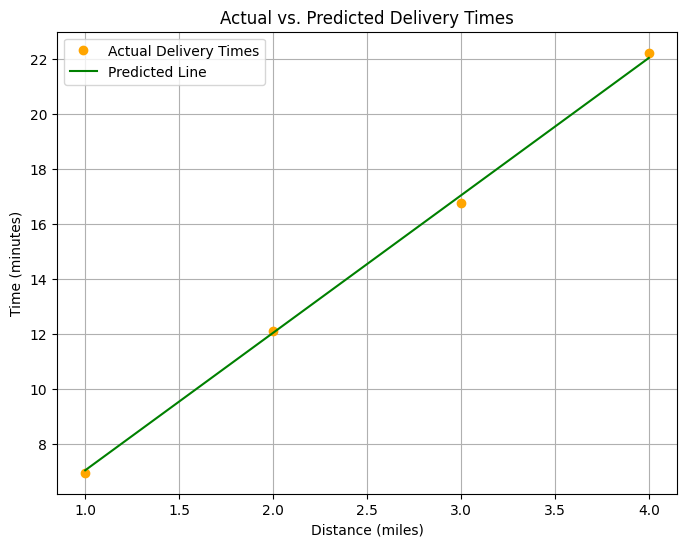

In [9]:
plot_results(model, distances, times)

### Making a prediction

In [10]:
distance_to_predict = 7.0

with torch.no_grad():
    predicted_time = model(torch.tensor([[distance_to_predict]], dtype=torch.float32))
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time.item():.1f} minutes")

Prediction for a 7.0-mile delivery: 37.0 minutes


### Non-linear dataset with linear model

In [11]:
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

with torch.no_grad():
    predictions = model(new_distances)

new_loss = loss_function(predictions, new_times)
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 182.24


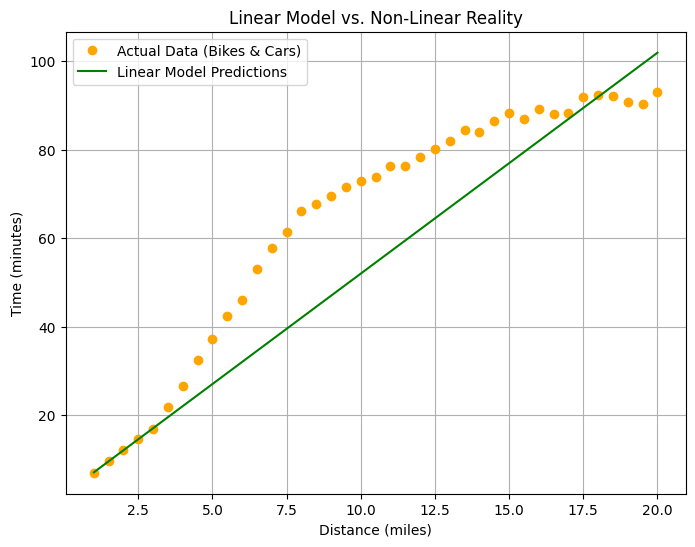

In [12]:
plot_nonlinear_comparison(model, new_distances, new_times)

### Non-Linear Model

In [13]:
distances_mean = distances.mean()
distances_std = distances.std()

times_mean = times.mean()
times_std = times.std()

# Data Normalization
distances_norm = (distances - distances_mean) / distances_std
times_norm = (times - times_mean) / times_std

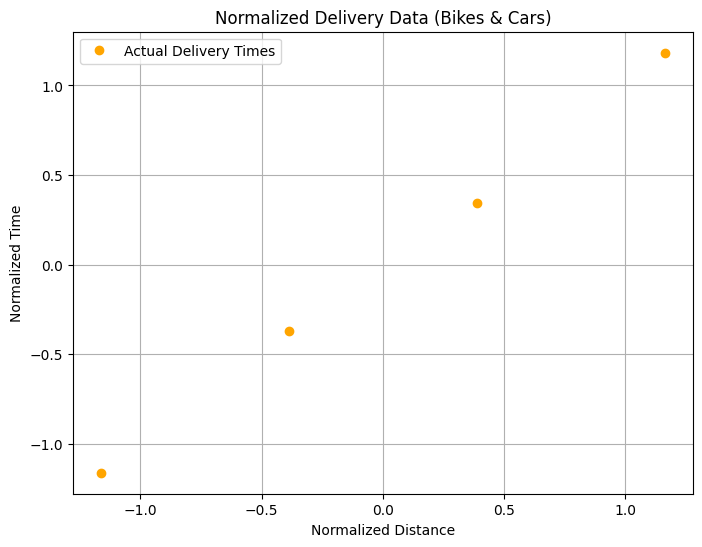

In [14]:
plot_data(distances_norm, times_norm, normalize=True)

In [15]:
torch.manual_seed(135)

model = nn.Sequential(
    nn.Linear(1, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_function = nn.MSELoss()

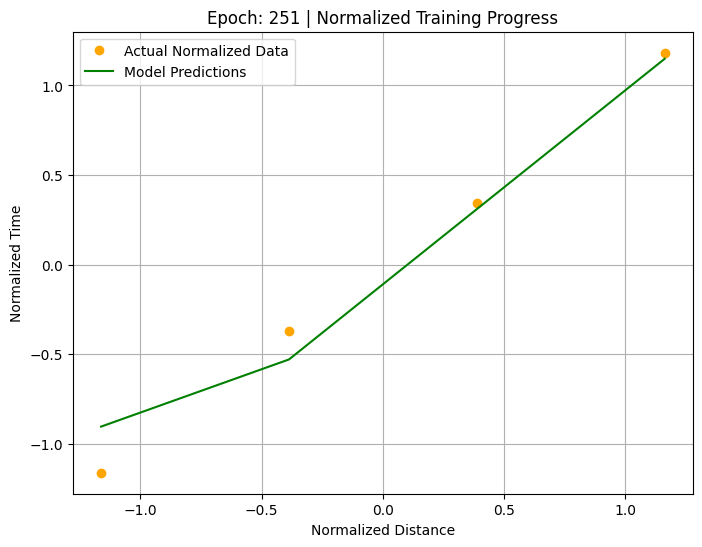

In [17]:
for epoch in range(300):
    optimizer.zero_grad()
    outputs = model(distances_norm)
    loss = loss_function(outputs, times_norm)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        plot_training_progress(
            epoch=epoch,
            loss=loss,
            model=model,
            distances_norm=distances_norm,
            times_norm=times_norm
        )

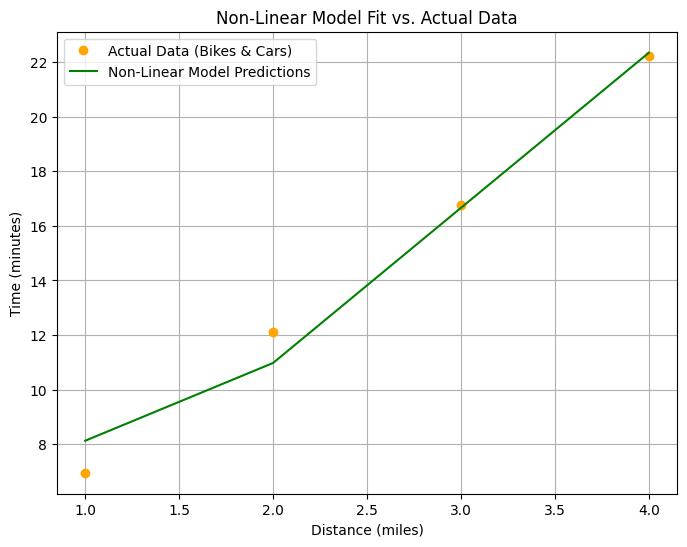

In [18]:
plot_final_fit(model, distances, times, distances_norm, times_std, times_mean)

In [19]:
distance_to_predict = 5.1

with torch.no_grad():
    distance_tensor = torch.tensor([[distance_to_predict]], dtype=torch.float32)
    new_distance_norm = (distance_tensor - distances_mean) / distances_std

    predicted_time_norm = model(distance_tensor)
    loss = loss_function(predicted_time_norm, new_distance_norm)

    predicted_time_actual = (predicted_time_norm * times_std) + times_mean
    print(f"Prediction for a {distance_to_predict}-mile delivery: {predicted_time_actual.item():.1f} minutes")

Prediction for a 5.1-mile delivery: 37.5 minutes


## Tensors

- Data shapes
    - vectors
    - matrices
    - `.shape`
- Data types
    - `dtype` for torch.tensor: e.g. `torch.tensor([1, 2, 3], dtype=torch.float32)
    - `float64`: extra precision
    - `int8`: memory efficient
    - `float32`: default and reliable
- Reshaping
- Indexing & Slicing
- Tensor Math

From python list:

In [20]:
vector = [1.0, 2.0, 3.0]
torch.tensor(vector)

tensor([1., 2., 3.])

From NumPy:

In [21]:
vector = np.array([1.0, 2.0, 3.0])
torch.from_numpy(vector)

tensor([1., 2., 3.], dtype=torch.float64)

In [22]:
vector = np.array([1.0, 2.0, 3.0])
torch.tensor(vector)

tensor([1., 2., 3.], dtype=torch.float64)

From dataframe:

In [23]:
df = pd.DataFrame([[1, 123, 22], [2, 456, 33], [3, 341, 44]])

# to numpy
values = df.values
torch.tensor(values)

tensor([[  1, 123,  22],
        [  2, 456,  33],
        [  3, 341,  44]])

zeros:

In [24]:
torch.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

ones:

In [25]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

random (between 0 and 1):

In [26]:
torch.rand(2, 3)

tensor([[0.3308, 0.7802, 0.2751],
        [0.9217, 0.7726, 0.3476]])

from a sequence:

In [27]:
range_tensor = torch.arange(0, 10, step=1)
range_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Reshaping

Unsqueezing: adding dimensions

In [28]:
t = torch.tensor(1)
batch = t.unsqueeze(0)
t.shape, batch, t, batch.shape

(torch.Size([]), tensor([1]), tensor(1), torch.Size([1]))

Squeeze: removing dimension

In [29]:
t = torch.tensor([1.0])
squeezed_t = t.squeeze(0)
t.shape, squeezed_t.shape, t, squeezed_t

(torch.Size([1]), torch.Size([]), tensor([1.]), tensor(1.))

In [30]:
t = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

reshaped_t = t.reshape(3, 2)
t.shape, reshaped_t.shape, t, reshaped_t

(torch.Size([2, 3]),
 torch.Size([3, 2]),
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]))

In [31]:
t = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

transposed_t = t.transpose(0, 1)
t.shape, transposed_t.shape, t, reshaped_t

(torch.Size([2, 3]),
 torch.Size([3, 2]),
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]))

Concatenation

In [32]:
t1 = torch.tensor([[1, 2, 3],
                   [4, 5, 6]])

t2 = torch.tensor([[3, 4, 5],
                   [6, 7, 8]])

torch.cat((t1, t2), dim=0), torch.cat((t1, t2), dim=1)

(tensor([[1, 2, 3],
         [4, 5, 6],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[1, 2, 3, 3, 4, 5],
         [4, 5, 6, 6, 7, 8]]))

### Indexing & Slicing

In [33]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

second_row_third_column = t[1, 2]
last_row = t[-1]
second_row_third_column, last_row

(tensor(7), tensor([ 9, 10, 11, 12]))

Slicing: Extracting sub-tensors using [start:end:step]

In [34]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# second and third rows
t[1:]

tensor([[ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [35]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# second row, third and forth columns
t[1, 2:]

tensor([7, 8])

In [36]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# first and second rows, second column onwards
t[:2, 1:]

tensor([[2, 3, 4],
        [6, 7, 8]])

In [37]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# second row, second column: get scalar value
t[1, 1].item()

6

Boolean Masking: Using a boolean tensor to select elements that meet a certain condition

In [38]:
t = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

t[t > 5]

tensor([ 6,  7,  8,  9, 10, 11, 12])

### Tensor Math

In [39]:
torch.tensor([[1.0, 2.0, 3.0]]) + torch.tensor([[1.0, 2.0, 3.0]])

tensor([[2., 4., 6.]])

Dot Product (torch.matmul()): Calculates the dot product of two vectors or matrices.

In [40]:
t1 = torch.tensor([1.0, 2.0, 3.0])
t2 = torch.tensor([1.0, 2.0, 3.0])

t1.matmul(t2)

tensor(14.)

Broadcasting: addition with scalar value

In [41]:
torch.tensor([[1.0, 2.0, 3.0]]) + 1.0
# 1 is expanded to [[1.0, 1.0, 1.0]] to match the tensor shape

tensor([[2., 3., 4.]])

Broadcasting: multiplication with scalar value

In [42]:
torch.tensor([[1.0, 2.0, 3.0]]) * 4.0
# 4 is expanded to [[4.0, 4.0, 4.0]] to match the tensor shape

tensor([[ 4.,  8., 12.]])

Broadcasting: rows and columns

In [43]:
t1 = torch.tensor([[1.0, 2.0, 3.0]])
t2 = torch.tensor([[1.0], [2.0], [3.0]])

t = t1 + t2
t1.shape, t2.shape, t.shape, t
# t1 has shape (1, 3), and expands to shape (3, 3)
# t2 has shape (3, 1), and expands to shape (3, 3)

(torch.Size([1, 3]),
 torch.Size([3, 1]),
 torch.Size([3, 3]),
 tensor([[2., 3., 4.],
         [3., 4., 5.],
         [4., 5., 6.]]))

This is how tensors expand:

In [44]:
t1.expand(3, 3), t2.expand(3, 3)

(tensor([[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]]),
 tensor([[1., 1., 1.],
         [2., 2., 2.],
         [3., 3., 3.]]))

In [45]:
t1 = torch.tensor([
    [1.0, 2.0, 3.0],
    [7.0, 12.0, 13.0],
    [41.0, 32.0, 23.0],
])

t2 = torch.tensor([[1.0, 2.0, 3.0]])

t = t1 * t2
t1.shape, t2.shape, t.shape, t
# t1 keeps shape (3, 3)
# t2 expands to shape (3, 3) with value:
# [
#     [1.0, 2.0, 3.0],
#     [1.0, 2.0, 3.0],
#     [1.0, 2.0, 3.0]
# ]
# t has shape (3, 3)

(torch.Size([3, 3]),
 torch.Size([1, 3]),
 torch.Size([3, 3]),
 tensor([[ 1.,  4.,  9.],
         [ 7., 24., 39.],
         [41., 64., 69.]]))

Logic

In [46]:
temperatures = torch.tensor([20, 35, 19, 35, 42])
print("TEMPERATURES:", temperatures)
print("-" * 50)

### Comparison Operators (>, <, ==)

# Use '>' (greater than) to find temperatures above 30
is_hot = temperatures > 30

# Use '<=' (less than or equal to) to find temperatures 20 or below
is_cool = temperatures <= 20

# Use '==' (equal to) to find temperatures exactly equal to 35
is_35_degrees = temperatures == 35

print("\nHOT (> 30 DEGREES):", is_hot)
print("COOL (<= 20 DEGREES):", is_cool)
print("EXACTLY 35 DEGREES:", is_35_degrees, "\n")

TEMPERATURES: tensor([20, 35, 19, 35, 42])
--------------------------------------------------

HOT (> 30 DEGREES): tensor([False,  True, False,  True,  True])
COOL (<= 20 DEGREES): tensor([ True, False,  True, False, False])
EXACTLY 35 DEGREES: tensor([False,  True, False,  True, False]) 



### Statistics

In [47]:
data = torch.tensor([10.0, 20.0, 30.0, 40.0, 50.0])
data.mean(), data.std()

(tensor(30.), tensor(15.8114))

## Exercises

In [48]:
sales_data = torch.tensor([[100, 120, 130, 110],   # Product A
                           [ 90,  95, 105, 125],   # Product B
                           [140, 115, 120, 150]    # Product C
                          ], dtype=torch.float32)

# 1. Calculate total sales for Product B.
total_sales_product_b = sales_data[1].sum().item()

# 2. Find months where sales for Product C were > 130.
high_sales_mask_product_c = sales_data[2] > 130

# 3. Get sales for Feb and Mar for all products.
sales_feb_mar = sales_data[:, 1:3]

print("\nTotal Sales for Product B:                   ", total_sales_product_b)
print("\nMonths with >130 Sales for Product C (Mask): ", high_sales_mask_product_c)
print("\nSales for Feb & Mar:\n\n", sales_feb_mar)


Total Sales for Product B:                    415.0

Months with >130 Sales for Product C (Mask):  tensor([ True, False, False,  True])

Sales for Feb & Mar:

 tensor([[120., 130.],
        [ 95., 105.],
        [115., 120.]])


In [49]:
# A batch of 4 grayscale images, each 3x3
image_batch = torch.rand(4, 3, 3)

print("ORIGINAL BATCH SHAPE:", image_batch.shape)
print("-" * 45)

# 1. Add a channel dimension at index 1.
image_batch_with_channel = image_batch.unsqueeze(dim=1)

# 2. Transpose the tensor to move the channel dimension to the end.
# Swap dimension 1 (channels) with dimension 3 (the last one).
image_batch_transposed = image_batch_with_channel.transpose(1, 3)

print("\nSHAPE AFTER UNSQUEEZE:", image_batch_with_channel.shape)
print("SHAPE AFTER TRANSPOSE:", image_batch_transposed.shape)

image_batch, image_batch_with_channel, image_batch_transposed

ORIGINAL BATCH SHAPE: torch.Size([4, 3, 3])
---------------------------------------------

SHAPE AFTER UNSQUEEZE: torch.Size([4, 1, 3, 3])
SHAPE AFTER TRANSPOSE: torch.Size([4, 3, 3, 1])


(tensor([[[0.4543, 0.3144, 0.1475],
          [0.6325, 0.5698, 0.1904],
          [0.6818, 0.3837, 0.2856]],
 
         [[0.4378, 0.5593, 0.0660],
          [0.4718, 0.4000, 0.7940],
          [0.1747, 0.2965, 0.0093]],
 
         [[0.3930, 0.5960, 0.5189],
          [0.5447, 0.7757, 0.7629],
          [0.1849, 0.8935, 0.2509]],
 
         [[0.1183, 0.5818, 0.9117],
          [0.9921, 0.9332, 0.0582],
          [0.8475, 0.8043, 0.4958]]]),
 tensor([[[[0.4543, 0.3144, 0.1475],
           [0.6325, 0.5698, 0.1904],
           [0.6818, 0.3837, 0.2856]]],
 
 
         [[[0.4378, 0.5593, 0.0660],
           [0.4718, 0.4000, 0.7940],
           [0.1747, 0.2965, 0.0093]]],
 
 
         [[[0.3930, 0.5960, 0.5189],
           [0.5447, 0.7757, 0.7629],
           [0.1849, 0.8935, 0.2509]]],
 
 
         [[[0.1183, 0.5818, 0.9117],
           [0.9921, 0.9332, 0.0582],
           [0.8475, 0.8043, 0.4958]]]]),
 tensor([[[[0.4543],
           [0.6325],
           [0.6818]],
 
          [[0.3144],
   

In [50]:
# Sensor readings (5 time steps)
temperature = torch.tensor([22.5, 23.1, 21.9, 22.8, 23.5])
humidity = torch.tensor([55.2, 56.4, 54.8, 57.1, 56.8])

print("TEMPERATURE DATA: ", temperature)
print("HUMIDITY DATA:    ", humidity)
print("-" * 45)

# 1. Concatenate the two tensors.
# Note: You need to unsqueeze them first to stack them vertically.
combined_data = torch.cat((temperature.unsqueeze(0), humidity.unsqueeze(0)), dim=0)

# 2. Create the weights tensor.
weights = torch.tensor([0.6, 0.4])

# 3. Apply weights using broadcasting.
# You need to reshape weights to [2, 1] to broadcast across columns.
weighted_data = combined_data * weights.reshape(2, 1) # or weights.unsqueeze(1)

# 4. Calculate the weighted average for each time step.
#    (A true average = weighted sum / sum of weights)
weighted_sum = weighted_data.sum(dim=0)
weighted_average = weighted_sum / weights.sum()
# weighted_sum = torch.sum(weighted_data, dim=0)
# weighted_average = weighted_sum / torch.sum(weights)

print("\nCOMBINED DATA (2x5):\n\n", combined_data)
print("\nWEIGHTED DATA:\n\n", weighted_data)
print("\nWEIGHTED SUM:", weighted_sum)
print("\nWEIGHTED AVERAGE:", weighted_average)

TEMPERATURE DATA:  tensor([22.5000, 23.1000, 21.9000, 22.8000, 23.5000])
HUMIDITY DATA:     tensor([55.2000, 56.4000, 54.8000, 57.1000, 56.8000])
---------------------------------------------

COMBINED DATA (2x5):

 tensor([[22.5000, 23.1000, 21.9000, 22.8000, 23.5000],
        [55.2000, 56.4000, 54.8000, 57.1000, 56.8000]])

WEIGHTED DATA:

 tensor([[13.5000, 13.8600, 13.1400, 13.6800, 14.1000],
        [22.0800, 22.5600, 21.9200, 22.8400, 22.7200]])

WEIGHTED SUM: tensor([35.5800, 36.4200, 35.0600, 36.5200, 36.8200])

WEIGHTED AVERAGE: tensor([35.5800, 36.4200, 35.0600, 36.5200, 36.8200])


In [51]:
# Data for 8 taxi trips: [distance, hour_of_day]
trip_data = torch.tensor([
    [5.3, 7],   # Not rush hour, not long
    [12.1, 9],  # Morning rush, long trip -> RUSH HOUR LONG
    [15.5, 13], # Not rush hour, long trip
    [6.7, 18],  # Evening rush, not long
    [2.4, 20],  # Not rush hour, not long
    [11.8, 17], # Evening rush, long trip -> RUSH HOUR LONG
    [9.0, 9],   # Morning rush, not long
    [14.2, 8]   # Morning rush, long trip -> RUSH HOUR LONG
], dtype=torch.float32)


print("ORIGINAL TRIP DATA (Distance, Hour):\n\n", trip_data)
print("-" * 55)

# 1. Slice the main tensor to get 1D tensors for each feature.
distances = trip_data[:, 0:1]
hours = trip_data[:, 1:]

print("distances", distances)
print("hours", hours)

# 2. Create boolean masks for each condition.
# - It's a long trip (distance > 10 km).
# - It occurs during a rush hour (8-10 AM or 5-7 PM, i.e., [8, 10) or [17, 19)).
is_long_trip = distances > 10.000
is_morning_rush = (hours >= 8.0) & (hours < 10.0)
is_evening_rush = (hours >= 17.0) & (hours < 19.0)

print("is_long_trip", is_long_trip)
print("is_morning_rush", is_morning_rush)
print("is_evening_rush", is_evening_rush)

# 3. Combine masks to identify rush hour long trips.
# A trip is a rush hour long trip if it's (a morning OR evening rush) AND a long trip.
is_rush_hour_long_trip_mask = (is_morning_rush | is_evening_rush) & (is_long_trip)

# 4. Reshape the new feature into a column vector and cast to float.
new_feature_col = is_rush_hour_long_trip_mask.float()

print("\n'IS RUSH HOUR LONG TRIP' MASK: ", is_rush_hour_long_trip_mask)
print("\nNEW FEATURE COLUMN (Reshaped):\n\n", new_feature_col)

# You can now concatenate this new feature to the original data
enhanced_trip_data = torch.cat((trip_data, new_feature_col), dim=1)
print("\nENHANCED DATA (with new feature at the end):\n\n", enhanced_trip_data)

ORIGINAL TRIP DATA (Distance, Hour):

 tensor([[ 5.3000,  7.0000],
        [12.1000,  9.0000],
        [15.5000, 13.0000],
        [ 6.7000, 18.0000],
        [ 2.4000, 20.0000],
        [11.8000, 17.0000],
        [ 9.0000,  9.0000],
        [14.2000,  8.0000]])
-------------------------------------------------------
distances tensor([[ 5.3000],
        [12.1000],
        [15.5000],
        [ 6.7000],
        [ 2.4000],
        [11.8000],
        [ 9.0000],
        [14.2000]])
hours tensor([[ 7.],
        [ 9.],
        [13.],
        [18.],
        [20.],
        [17.],
        [ 9.],
        [ 8.]])
is_long_trip tensor([[False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True]])
is_morning_rush tensor([[False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [ True]])
is_evening_rush tensor([[False],
        [False],
        [False],
        [ True],
   

## ML Pipeline in PyTorch


In [52]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081))
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.05MB/s]


In [53]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        # [1,28,28] = 1 channel and 28x28 pixels
        # [64,1,28,28] -> 64 is the batch size
        # 28x28 = 784
        # [64,1,28,28] -> flatten -> [64,784]
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers(x)
        return x

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MNISTClassifier().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [55]:
def train(model, train_dataloader, loss_function, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for index, (data, target) in enumerate(train_dataloader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        # the loss_function compares the output and the target
        # the output has logits and the function knows the maximum value is the most probable value (prediction)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        # dimension 0 is the batch dimension
        # dimension 1 is the class dimension
        # .max(1) will get the maximum value of each class dimension (dimension=1)
        _, predicted = output.max(1)
        # the batch size
        total += target.size(0)
        # compare the predicted to the target and sum all of them are are correct
        correct += predicted.eq(target).sum().item()

        if index % 100 == 0 and index > 0:
            avg_loss = running_loss / 100
            accuracy = 100.0 * correct / total
            print(f"{index} - Loss: {avg_loss:.3f} | Accuracy: {accuracy:.1f}%")
            running_loss = 0.0

In [56]:
train(model, train_dataloader, loss_function, optimizer, device)

100 - Loss: 0.629 | Accuracy: 82.5%
200 - Loss: 0.317 | Accuracy: 86.5%
300 - Loss: 0.274 | Accuracy: 88.3%
400 - Loss: 0.221 | Accuracy: 89.6%
500 - Loss: 0.210 | Accuracy: 90.5%
600 - Loss: 0.195 | Accuracy: 91.1%
700 - Loss: 0.159 | Accuracy: 91.7%
800 - Loss: 0.162 | Accuracy: 92.1%
900 - Loss: 0.152 | Accuracy: 92.5%


In [57]:
def evaluate(model, test_dataloader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    return 100.0 * correct / total

In [58]:
evaluate(model, test_dataloader, device)

95.84